In [182]:
import pandas as pd
import numpy as np
from src import data_cleaning as dc
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
people_df = pd.read_csv('src/data/baseballdatabank-master/core/People.csv')
batting_df = pd.read_csv('src/data/baseballdatabank-master/core/Batting.csv')
fielding_df = pd.read_csv('src/data/baseballdatabank-master/core/Fielding.csv')

In [15]:
# initial drop
batting_df2 = dc.initial_drop(batting_df)
batting_df2.head()

playerID  yearID   G   AB   R   H  2B  3B  HR   RBI   SB   CS  BB   SO  \
0  abercda01    1871   1    4   0   0   0   0   0   0.0  0.0  0.0   0  0.0   
1   addybo01    1871  25  118  30  32   6   0   0  13.0  8.0  1.0   4  0.0   
2  allisar01    1871  29  137  28  40   4   5   0  19.0  3.0  1.0   2  5.0   
3  allisdo01    1871  27  133  28  44  10   2   2  27.0  1.0  1.0   0  2.0   
4  ansonca01    1871  25  120  29  39  11   3   0  16.0  6.0  2.0   2  1.0   

   IBB  HBP  SH  SF  GIDP  
0  NaN  NaN NaN NaN   0.0  
1  NaN  NaN NaN NaN   0.0  
2  NaN  NaN NaN NaN   1.0  
3  NaN  NaN NaN NaN   0.0  
4  NaN  NaN NaN NaN   0.0

In [16]:
# combine stints into single year collection
batting_df3 = dc.combine_stints(batting_df2)
batting_df3.head()

Combining multiple stints into single years...


playerID  yearID   G  AB  R  H  2B  3B  HR  RBI   SB   CS  BB   SO  IBB  \
0  aardsda01    2004  11   0  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   
1  aardsda01    2006  45   2  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   
2  aardsda01    2007  25   0  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   
3  aardsda01    2008  47   1  0  0   0   0   0  0.0  0.0  0.0   0  1.0  0.0   
4  aardsda01    2009  73   0  0  0   0   0   0  0.0  0.0  0.0   0  0.0  0.0   

   HBP   SH   SF  GIDP  
0  0.0  0.0  0.0   0.0  
1  0.0  1.0  0.0   0.0  
2  0.0  0.0  0.0   0.0  
3  0.0  0.0  0.0   0.0  
4  0.0  0.0  0.0   0.0

In [223]:
# map each player's most common position to their batting stats
bat_with_pos_df = dc.map_position(batting_df3, fielding_df)
bat_with_pos_df.head()

Mapping positions to batting stats...


playerID  yearID    G   AB    R    H  2B  3B  HR    RBI   SB   CS  BB  \
9   aaronha01    1954  122  468   58  131  27   6  13   69.0  2.0  2.0  28   
10  aaronha01    1955  153  602  105  189  37   9  27  106.0  3.0  1.0  49   
11  aaronha01    1956  153  609  106  200  34  14  26   92.0  2.0  4.0  37   
12  aaronha01    1957  151  615  118  198  27   6  44  132.0  1.0  1.0  57   
13  aaronha01    1958  153  601  109  196  34   4  30   95.0  4.0  1.0  59   

      SO   IBB  HBP   SH   SF  GIDP pos  
9   39.0   0.0  3.0  6.0  4.0  13.0  OF  
10  61.0   5.0  3.0  7.0  4.0  20.0  OF  
11  54.0   6.0  2.0  5.0  7.0  21.0  OF  
12  58.0  15.0  0.0  0.0  3.0  13.0  OF  
13  49.0  16.0  1.0  0.0  3.0  21.0  OF

In [119]:
bat_with_pos_df['avg'] = bat_with_pos_df['H'] / bat_with_pos_df['AB']

playerID  yearID    G   AB    R    H  2B  3B  HR    RBI    ...     \
9      aaronha01    1954  122  468   58  131  27   6  13   69.0    ...      
10     aaronha01    1955  153  602  105  189  37   9  27  106.0    ...      
11     aaronha01    1956  153  609  106  200  34  14  26   92.0    ...      
12     aaronha01    1957  151  615  118  198  27   6  44  132.0    ...      
13     aaronha01    1958  153  601  109  196  34   4  30   95.0    ...      
14     aaronha01    1959  154  629  116  223  46   7  39  123.0    ...      
15     aaronha01    1960  153  590  102  172  20  11  40  126.0    ...      
16     aaronha01    1961  155  603  115  197  39  10  34  120.0    ...      
17     aaronha01    1962  156  592  127  191  28   6  45  128.0    ...      
18     aaronha01    1963  161  631  121  201  29   4  44  130.0    ...      
19     aaronha01    1964  145  570  103  187  30   2  24   95.0    ...      
20     aaronha01    1965  150  570  109  181  40   1  32   89.0    ...      
21     aaronha01    1966  158  603  117  168  23   1  44  127.0    ...      
22     aaronha01    1967  155  600  113  184  37   3  39  109.0    ...      
23     aaronha01    1968  160  606   84  174  33   4  29   86.0    ...      
24     aaronha01    1969  147  547  100  164  30   3  44   97.0    ...      
25     aaronha01    1970  150  516  103  154  26   1  38  118.0    ...      
26     aaronha01    1971  139  495   95  162  22   3  47  118.0    ...      
27     aaronha01    1972  129  449   75  119  10   0  34   77.0    ...      
28     aaronha01    1973  120  392   84  118  12   1  40   96.0    ...      
29     aaronha01    1974  112  340   47   91  16   0  20   69.0    ...      
30     aaronha01    1975  137  465   45  109  16   2  12   60.0    ...      
31     aaronha01    1976   85  271   22   62   8   0  10   35.0    ...      
32     aaronto01    1962  141  334   54   77  20   2   8   38.0    ...      
33     aaronto01    1963   72  135    6   27   6   1   1   15.0    ...      
34     aaronto01    1965    8   16    1    3   0   0   0    1.0    ...      
35     aaronto01    1968   98  283   21   69  10   3   1   25.0    ...      
36     aaronto01    1969   49   60   13   15   2   0   1    5.0    ...      
37     aaronto01    1970   44   63    3   13   2   0   2    7.0    ...      
38     aaronto01    1971   25   53    4   12   2   0   0    3.0    ...      
...          ...     ...  ...  ...  ...  ...  ..  ..  ..    ...    ...      
96555  zoskyed01    2000    4    4    0    0   0   0   0    0.0    ...      
96567  zuberjo01    1996   30   91    7   23   4   0   1   10.0    ...      
96568  zuberjo01    1998   38   45    6   11   3   1   2    6.0    ...      
96569  zuletju01    2000   30   68   13   20   8   0   3   12.0    ...      
96570  zuletju01    2001   49  106   11   23   3   0   6   24.0    ...      
96576  zuninmi01    2013   52  173   22   37   5   0   5   14.0    ...      
96577  zuninmi01    2014  131  438   51   87  20   2  22   60.0    ...      
96578  zuninmi01    2015  112  350   28   61  11   0  11   28.0    ...      
96579  zuninmi01    2016   55  164   16   34   7   0  12   31.0    ...      
96580  zuninmi01    2017  124  387   52   97  25   0  25   64.0    ...      
96581  zupcibo01    1991   18   25    3    4   0   0   1    3.0    ...      
96582  zupcibo01    1992  124  392   46  108  19   1   3   43.0    ...      
96583  zupcibo01    1993  141  286   40   69  24   2   2   26.0    ...      
96584  zupcibo01    1994   36   92   10   18   4   1   1    8.0    ...      
96585   zupofr01    1957   10   12    2    1   0   0   0    0.0    ...      
96586   zupofr01    1958    1    2    0    0   0   0   0    0.0    ...      
96587   zupofr01    1961    5    4    1    2   1   0   0    0.0    ...      
96588  zuvelpa01    1982    2    1    0    0   0   0   0    0.0    ...      
96589  zuvelpa01    1983    3    5    0    0   0   0   0    0.0    ...      
96590  zuvelpa01    1984   11   25    2    5   1   0   0    1.0    ...      
9659

In [120]:
# def condense_df(df0):
#     df = df0.set_index('playerID')
#     player_list = []
#     for player in df.index.unique():
#         def_dict = defaultdict(str)
#         def_dict['playerID'] = player   
#         if isinstance(df.loc[player, 'pos'], str):
#             def_dict['pos'] = df.loc[player, 'pos']
#         else:
#             def_dict['pos'] = df.loc[player, 'pos'].unique()[0]
            
#         for col in df.columns:
#             if col == 'yearID' or col == 'pos':
#                 continue
#             try:
#                 for i, v in enumerate(df.loc[player, col]):
#                     if i > 6:
#                         continue
#                     key = 'year' + str(i + 1) + '_' + col
#                     def_dict[key] = v
#             except:
#                 continue # skip players with only 1 year of data
#         player_list.append(def_dict)
#     new_df = pd.DataFrame(player_list)
#     return new_df.dropna() #drop players without 7 years of data

In [137]:
test_df = dc.condense_df(bat_with_pos_df)

playerID  year1_2B  year1_3B  year1_AB  year1_BB  year1_CS  year1_G  \
0      aaronha01      27.0       6.0     468.0      28.0       2.0    122.0   
1      aaronto01      20.0       2.0     334.0      41.0       0.0    141.0   
4      abbated01       0.0       0.0      10.0       1.0       0.0      3.0   
8      abbotku01       1.0       0.0      61.0       3.0       0.0     20.0   
15     abramca01       1.0       0.0      24.0       7.0       0.0      8.0   
16     abreubo01       1.0       0.0      22.0       2.0       0.0     15.0   
23     adairje01       0.0       0.0      19.0       1.0       0.0     11.0   
26     adamsbe01       0.0       0.0      13.0       0.0       0.0      5.0   
27     adamsbo03      13.0       3.0     311.0      18.0       0.0     94.0   
34     adamsgl01       2.0       1.0      90.0      11.0       0.0     61.0   
43     adamssp01       0.0       1.0      44.0       4.0       2.0     11.0   
45     adcocjo01      16.0       1.0     372.0      24.0       0.0    102.0   
57      ageeto01       0.0       0.0      14.0       0.0       0.0      5.0   
60     agnewsa01       9.0       5.0     307.0      20.0       0.0    105.0   
61     aguaylu01       1.0       2.0      47.0       2.0       1.0     20.0   
66     aikenwi01       4.0       0.0      91.0      10.0       2.0     42.0   
68     ainsmed01       1.0       2.0     104.0       6.0       0.0     33.0   
80     aldremi01      18.0       3.0     216.0      33.0       3.0     84.0   
84     alexaga01       0.0       0.0       3.0       1.0       0.0      3.0   
92     alfoned01      13.0       5.0     335.0      12.0       1.0    101.0   
95     alicelu01      10.0       4.0     297.0      25.0       1.0     93.0   
96     allanan01       7.0       3.0     293.0      14.0       1.0    101.0   
97     allenbe01      27.0       7.0     573.0      62.0       1.0    159.0   
98     allenbo01      15.0      11.0     456.0      87.0       0.0    133.0   
101    allench01      21.0       3.0     481.0      37.0       7.0    137.0   
102    allendi01       2.0       1.0      24.0       0.0       0.0     10.0   
104    allenet01       1.0       0.0      13.0       0.0       0.0     18.0   
105    allenga01      10.0       2.0     241.0      20.0       1.0    108.0   
108    allenha02       0.0       0.0      31.0       3.0       0.0      9.0   
121    alleyge01       1.0       0.0      51.0       2.0       1.0     17.0   
...          ...       ...       ...       ...       ...       ...      ...   
10051  youngba01       0.0       0.0       1.0       0.0       0.0      1.0   
10053  youngch04       4.0       0.0      70.0       6.0       1.0     30.0   
10056  youngde03       9.0       1.0     126.0       1.0       2.0     30.0   
10059  youngdm01       0.0       0.0      29.0       4.0       1.0     16.0   
10061  younger01       1.0       0.0     132.0       8.0       1.0     49.0   
10062  younger02       1.0       0.0      30.0       1.0       0.0     11.0   
10063  younger03       1.0       0.0      57.0       4.0       4.0     30.0   
10064  youngge02       9.0       2.0     274.0      26.0       9.0     71.0   
10068  youngjo02       1.0       1.0      57.0       2.0       0.0     55.0   
10069  youngke01       0.0       0.0       7.0       2.0       0.0     10.0   
10071  youngmi01       0.0       0.0       2.0       0.0       0.0      6.0   
10072  youngmi02       0.0       0.0       2.0       0.0       0.0      2.0   
10073  youngpe01       1.0       1.0      20.0       0.0       0.0     25.0   
10074  youngra01       0.0       0.0      15.0       3.0       0.0      7.0   
10075  youngro01       2.0       3.0      26.0       1.0       0.0      7.0   
10079  yountro01      14.0       5.0     344.0      12.0       7.0    107.0   
10081  yvarssa01       0.0       0.0       5.0       0.0       0.0      1.0   
10090  zarilal01       7.0       1.0     228.0      17.0       1.0     70.0   
10092   zaungr01       5.0       0.0     104.0      16.0  

In [169]:
avg_pos_cols = [col for col in test_df.columns if 'avg' in col or 'pos' in col]
avg_cols = [col for col in test_df.columns if 'avg' in col]
avg_pos_cols

['year1_avg',
 'year2_avg',
 'year3_avg',
 'year4_avg',
 'year5_avg',
 'year6_avg',
 'year7_avg',
 'pos_1B',
 'pos_2B',
 'pos_3B',
 'pos_C',
 'pos_OF',
 'pos_SS']

In [170]:
test_df_avgs_pos = test_df[avg_pos_cols]
test_df_avgs = test_df[avg_cols]

In [174]:
X_pos = test_df_avgs_pos
y_pos = X_pos.pop('year7_avg')

X_train_pos, X_test_pos, y_train_pos, y_true_pos = train_test_split(X_pos, y_pos)

regr = RandomForestRegressor()
regr.fit(X_train_pos, y_train_pos)
y_pred_pos = regr.predict(X_test_pos)

In [193]:
results_pos = pd.DataFrame(data=y_true_pos)
results_pos['predicted'] = y_pred_pos
results_pos['diff'] = results_pos['year7_avg'] - results_pos['predicted']
results_pos.reset_index(drop=True, inplace=True)
results_pos

year7_avg  predicted      diff
0     0.271739   0.251912  0.019827
1     0.283019   0.253385  0.029634
2     0.000000   0.205162 -0.205162
3     0.291855   0.186428  0.105427
4     0.273585   0.225352  0.048233
5     0.250575   0.240404  0.010171
6     0.170455   0.256473 -0.086019
7     0.251984   0.229770  0.022214
8     0.200000   0.177953  0.022047
9     0.228070   0.225721  0.002349
10    0.217143   0.316268 -0.099125
11    0.305668   0.315775 -0.010107
12    0.274052   0.236859  0.037193
13    0.318665   0.278451  0.040214
14    0.133333   0.231675 -0.098342
15    0.325648   0.277923  0.047725
16    0.366109   0.297329  0.068779
17    0.287037   0.237566  0.049471
18    0.293532   0.217141  0.076392
19    0.252336   0.247088  0.005249
20    0.226708   0.213597  0.013111
21    0.294643   0.225334  0.069309
22    0.257353   0.201517  0.055836
23    0.221538   0.239176 -0.017637
24    0.308550   0.290180  0.018370
25    0.230496   0.257810 -0.027314
26    0.306061   0.274615  0.031446
27    0.260664   0.228470  0.032193
28    0.200000   0.236079 -0.036079
29    0.281250   0.239066  0.042184
..         ...        ...       ...
785   0.285714   0.302466 -0.016752
786   0.181818   0.248303 -0.066485
787   0.186047   0.253449 -0.067403
788   0.302789   0.254676  0.048113
789   0.318482   0.252636  0.065846
790   0.243119   0.220620  0.022499
791   0.234375   0.244396 -0.010021
792   0.200000   0.287233 -0.087233
793   0.322896   0.295142  0.027754
794   0.267974   0.262944  0.005030
795   0.255144   0.279108 -0.023964
796   0.250765   0.273984 -0.023219
797   0.262799   0.252362  0.010437
798   0.341270   0.349256 -0.007986
799   0.244838   0.263920 -0.019083
800   0.269663   0.264665  0.004998
801   0.242188   0.202046  0.040141
802   0.297203   0.204887  0.092316
803   0.319073   0.295046  0.024027
804   0.274005   0.253765  0.020240
805   0.292857   0.253032  0.039825
806   0.255906   0.223859  0.032046
807   0.255605   0.305512 -0.049907
808   0.270016   0.231952  0.038064
809   0.227273   0.237813 -0.010541
810   0.081081   0.170331 -0.089250
811   0.254098   0.221851  0.032247
812   0.229698   0.246756 -0.017058
813   0.244541   0.266518 -0.021977
814   0.206612   0.270363 -0.063751

[815 rows x 3 columns]

In [177]:
mse_pos = mean_squared_error(y_true_pos, y_pred_pos)
rmse_pos = mse_pos**0.5
score_pos = regr.score(X_test_pos, y_true_pos)
print('MSE: {:.3f}\n'\
      'RMSE: {:.3f}\n'\
      'Score: {:.3f}'.format(mse_pos, rmse_pos, score_pos))

MSE: 0.004
RMSE: 0.065
Score: 0.032


In [178]:
X_avg = test_df_avgs
y_avg = X_avg.pop('year7_avg')

X_train_avg, X_test_avg, y_train_avg, y_true_avg = train_test_split(X_avg, y_avg)
regr_avg = RandomForestRegressor()
regr_avg.fit(X_train_avg, y_train_avg)
y_pred_avg = regr_avg.predict(X_test_avg)

In [192]:
results_avg = pd.DataFrame(data=y_true_avg)
results_avg['predicted'] = y_pred_avg
results_avg['difference'] = results_avg['year7_avg'] - results_avg['predicted']
results_avg.reset_index(drop=True, inplace=True)
results_avg

year7_avg  predicted  difference
0     0.256228   0.266532   -0.010304
1     0.263682   0.215743    0.047938
2     0.227273   0.218343    0.008930
3     0.242718   0.281757   -0.039038
4     0.268199   0.290082   -0.021882
5     0.298569   0.294511    0.004058
6     0.201258   0.165563    0.035695
7     0.289062   0.284656    0.004406
8     0.258383   0.268021   -0.009639
9     0.284153   0.303237   -0.019084
10    0.308511   0.232139    0.076371
11    0.292282   0.295432   -0.003149
12    0.223333   0.218264    0.005070
13    0.280069   0.268373    0.011695
14    0.280464   0.271738    0.008726
15    0.252632   0.187873    0.064758
16    0.256881   0.241878    0.015003
17    0.207965   0.235821   -0.027856
18    0.262009   0.285500   -0.023491
19    0.304721   0.256030    0.048691
20    0.291246   0.228716    0.062529
21    0.212389   0.187247    0.025142
22    0.304038   0.202900    0.101138
23    0.256356   0.252130    0.004226
24    0.259615   0.237799    0.021817
25    0.315018   0.299122    0.015896
26    0.255639   0.226678    0.028961
27    0.244318   0.228721    0.015597
28    0.243478   0.286895   -0.043417
29    0.245455   0.231445    0.014009
..         ...        ...         ...
785   0.260563   0.176087    0.084476
786   0.297391   0.283070    0.014321
787   0.351351   0.279913    0.071438
788   0.278723   0.354585   -0.075862
789   0.314991   0.295209    0.019782
790   0.312500   0.268409    0.044091
791   0.321429   0.301474    0.019955
792   0.281931   0.255126    0.026805
793   0.245763   0.239407    0.006356
794   0.285981   0.259719    0.026262
795   0.230769   0.166039    0.064731
796   0.251295   0.219347    0.031948
797   0.342488   0.288965    0.053523
798   0.271357   0.263316    0.008041
799   0.254743   0.255364   -0.000621
800   0.272997   0.234306    0.038691
801   0.249221   0.255863   -0.006642
802   0.272727   0.301456   -0.028729
803   0.268657   0.256414    0.012243
804   0.254237   0.232387    0.021851
805   0.245614   0.237892    0.007722
806   0.146341   0.204491   -0.058150
807   0.352612   0.343266    0.009346
808   0.281532   0.242492    0.039039
809   0.259843   0.244559    0.015283
810   0.233945   0.244018   -0.010073
811   0.325431   0.261205    0.064226
812   0.235669   0.261449   -0.025780
813   0.250000   0.265725   -0.015725
814   0.321008   0.296217    0.024792

[815 rows x 3 columns]

In [181]:
mse_avg = mean_squared_error(y_true_avg, y_pred_avg)
rmse_avg = mse_avg**0.5
score_avg = regr_avg.score(X_test_avg, y_true_avg)
print('MSE: {:.3f}\n'\
      'RMSE: {:.3f}\n'\
      'Score: {:.3f}'.format(mse_avg, rmse_avg, score_avg))

MSE: 0.003
RMSE: 0.053
Score: 0.036


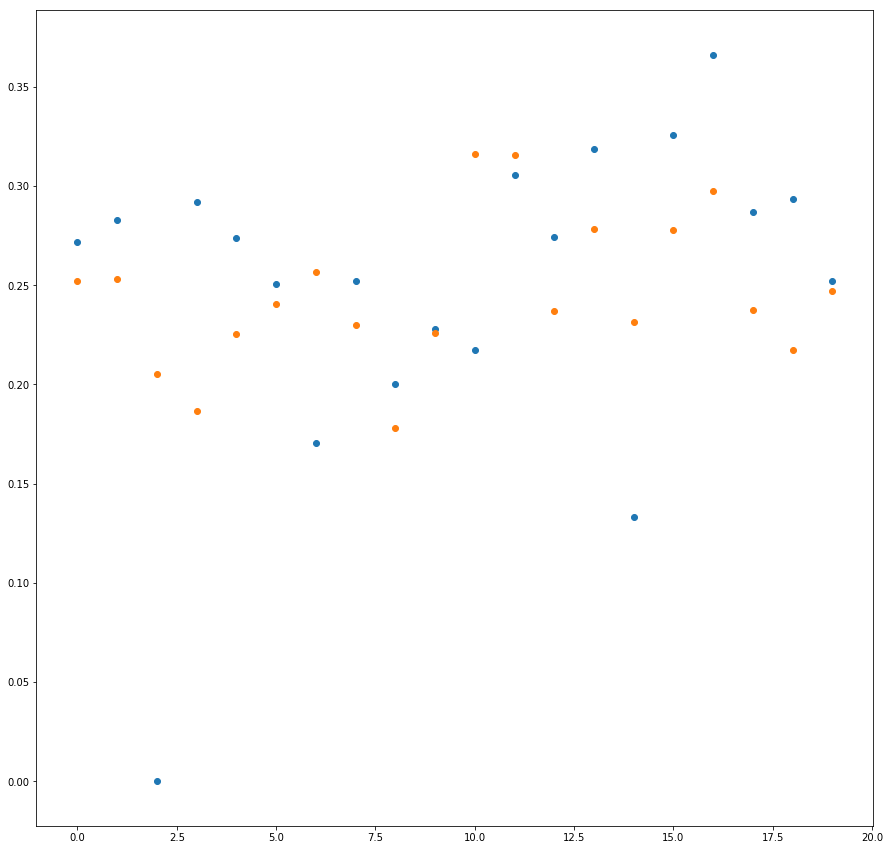

In [195]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(results_pos.index[:20], results_pos['year7_avg'][:20])
plt.scatter(results_pos.index[:20], results_pos['predicted'][:20])
plt.show()

In [196]:
results_pos.sort_values('diff')

year7_avg  predicted      diff
521   0.000000   0.286123 -0.286123
280   0.000000   0.283005 -0.283005
278   0.000000   0.253951 -0.253951
257   0.000000   0.230538 -0.230538
657   0.000000   0.227189 -0.227189
253   0.047619   0.273850 -0.226231
119   0.000000   0.221006 -0.221006
154   0.000000   0.217720 -0.217720
2     0.000000   0.205162 -0.205162
738   0.069767   0.228586 -0.158819
91    0.111111   0.269161 -0.158050
762   0.105263   0.256220 -0.150957
527   0.111111   0.262003 -0.150891
313   0.125000   0.275137 -0.150137
350   0.083333   0.232543 -0.149210
421   0.100000   0.245199 -0.145199
372   0.161290   0.305446 -0.144156
370   0.066667   0.200589 -0.133922
353   0.076923   0.210498 -0.133575
627   0.163636   0.295033 -0.131397
296   0.111111   0.241605 -0.130494
606   0.107143   0.231142 -0.123999
134   0.113636   0.235750 -0.122113
522   0.153846   0.274044 -0.120198
477   0.184713   0.304207 -0.119494
699   0.158537   0.264234 -0.105698
467   0.159420   0.263736 -0.104315
391   0.176471   0.280721 -0.104251
196   0.140845   0.244987 -0.104142
10    0.217143   0.316268 -0.099125
..         ...        ...       ...
681   0.351032   0.273275  0.077757
30    0.267974   0.189519  0.078455
597   0.275463   0.195968  0.079495
768   0.320388   0.240843  0.079545
508   0.308585   0.228698  0.079887
538   0.313725   0.232045  0.081681
704   0.262222   0.179774  0.082448
93    0.303207   0.220154  0.083053
743   0.300481   0.214189  0.086292
238   0.326130   0.238959  0.087171
176   0.372093   0.284588  0.087505
499   0.287425   0.198068  0.089357
465   0.300546   0.210453  0.090094
635   0.387833   0.296657  0.091176
166   0.335541   0.243555  0.091986
802   0.297203   0.204887  0.092316
3     0.291855   0.186428  0.105427
48    0.291246   0.185692  0.105554
530   0.284351   0.175844  0.108507
165   0.345930   0.234293  0.111637
324   0.283843   0.169362  0.114481
104   0.252336   0.136146  0.116190
551   0.320000   0.195835  0.124165
38    0.342105   0.216911  0.125194
65    0.279070   0.153402  0.125668
330   0.242105   0.111623  0.130482
433   0.361702   0.227234  0.134468
741   0.333333   0.163958  0.169376
221   1.000000   0.218856  0.781144
426   1.000000   0.197721  0.802279

[815 rows x 3 columns]

In [225]:
def trim_batters(df):
    # remove those seasons where batter had less than 100 ABs
    bat_with_pos_df = bat_with_pos_df[bat_with_pos_df['AB'] > 100]

    # remove batters with less than 7 years experience
    s = bat_with_pos_df['playerID'].value_counts()
    bat_with_pos_df = bat_with_pos_df[bat_with_pos_df['playerID'].isin(s[s > 6].index)]

    # select first 7 seasons
    bat_with_pos_df = bat_with_pos_df.groupby('playerID').head(7)

In [229]:
new_df = dc.trim_batters(bat_with_pos_df)

In [253]:
# this gets nth row (year) of a player and converts to dict
bat_with_pos_df.groupby('playerID').nth(6)

2B  3B   AB   BB    CS    G  GIDP    H   HBP  HR   IBB    R    RBI  \
playerID                                                                        
aaronha01  20  11  590   60   7.0  153   8.0  172   2.0  40  13.0  102  126.0   
aaronto01   2   0   53    3   0.0   25   3.0   12   0.0   0   1.0    4    3.0   
abbated01  16   7  500   58   0.0  146   0.0  125   7.0   1   0.0   43   61.0   
abbotku01  17   2  286   16   2.0   96   4.0   78   0.0   8   0.0   41   41.0   
abramca01  12   3  309   89   8.0  118   6.0   75   3.0   6   2.0   56   32.0   
abreubo01  50   6  572  104  12.0  157  11.0  176   3.0  20   9.0  102   85.0   
adairje01  20   3  569   28   2.0  155  20.0  141   1.0   9  10.0   56   47.0   
adamsbe01   4   0  227   10   0.0   84   0.0   40   1.0   0   0.0   10   12.0   
adamsbo03  25   4  637   49   9.0  154  15.0  180   0.0   6   0.0   85   48.0   
adamsgl01  10   0  220   20   1.0   72  10.0   46   0.0   2   4.0   13   24.0   
adamssp01  14   6  539   64   0.0  135   0.0  149   4.0   0   0.0   91   38.0   
adcocjo01  23   1  454   32   0.0  137  11.0  132   1.0  38   6.0   76  103.0   
ageeto01   12   3  368   15   8.0  132   8.0   80   4.0   5   3.0   30   17.0   
agnewsa01   7   0   98   10   0.0   42   0.0   23   1.0   0   0.0    6   10.0   
aguaylu01   6   1  133    8   1.0   62   3.0   28   3.0   4   0.0   17   13.0   
aikenwi01   7   0  234   29   0.0   93   6.0   48   2.0  11   1.0   21   26.0   
ainsmed01   4   0  100    8   0.0   51   0.0   17   0.0   0   0.0   11    8.0   
aldremi01  13   1  255   34   1.0   95   7.0   68   0.0  10   2.0   40   33.0   
alexaga01   4   1   47    3   0.0   21   1.0   10   0.0   1   0.0    6    6.0   
alexama01   0   1   13    0   1.0   44   0.0    7   0.0   0   0.0   16    1.0   
alexama02  11   2  177   10   0.0   90   1.0   48   0.0   0   0.0   17   15.0   
alfoned01  22   0  457   51   0.0  124   7.0  111   5.0  17   0.0   64   49.0   
alicelu01  26   3  380   52   3.0  129   4.0   98   5.0   5  10.0   54   42.0   
allanan01   1   0   24    1   0.0   13   1.0    4   0.0   0   0.0    3    2.0   
allenbe01  12   4  373   28   0.0  120   8.0   90   4.0   6   5.0   31   40.0   
allenbo01   1   0   15    0   0.0    5   0.0    2   1.0   0   0.0    0    1.0   
allench01   1   1   53    2   1.0   21   2.0   15   0.0   0   0.0    5    5.0   
allendi01  23   3  438   64   3.0  118  10.0  126   0.0  32  10.0   79   89.0   
allenet01   6   2  103    1   0.0   54   0.0   18   2.0   1   0.0   13    7.0   
allenga01   1   0   34    0   0.0   14   1.0    4   0.0   0   0.0    2    3.0   
...        ..  ..  ...  ...   ...  ...   ...  ...   ...  ..   ...  ...    ...   
youngbo01   0   0    0    0   0.0    1   0.0    0   0.0   0   0.0    0    0.0   
youngch04  24   0  325   36   3.0  101   4.0   75   2.0  14   0.0   36   41.0   
youngde03  27   1  574   20   2.0  151  20.0  153   7.0  18   1.0   54   74.0   
youngdm01  14   0  201   12   0.0   54  12.0   57   2.0   7   5.0   25   27.0   
younger01  24   1  452   45  13.0  117   4.0  129   5.0   8   0.0   78   43.0   
younger02   0   0   11    4   2.0    5   1.0    2   0.0   0   0.0    0    0.0   
younger03   4   2   85    6   2.0   53   1.0   13   1.0   0   1.0   16    5.0   
youngge02   0   0   19    4   1.0   19   2.0    1   0.0   0   0.0    5    1.0   
youngjo02  14   0  292   17   5.0  120   6.0   70   8.0   3   2.0   37   29.0   
youngke01  40   2  592   44   7.0  159  20.0  160  11.0  27   1.0   88  108.0   
youngmi01  14   0  160   28   0.0   83   1.0   33   2.0   1   2.0   15   14.0   
youngmi02  52   3  691   48   3.0  162  27.0  217   1.0  14   0.0   93  103.0   
youngpe01  14   3  293   23   0.0   84   7.0   81   2.0   3   0.0   34   29.0   
youngra01  21   6  594   85  13.0  150   0.0  173   2.0   0   0.0   84   33.0   
youngro01  33  12  596   73  19.0  152   0.0  200   5.0   3   0.0  121   87.0   
yountro01  49  10  611   26   5.0  143   8.0  179   1.0  23   1.0  121   87.0   
yvarssa01   2   0  104   11   1.0   53   7

In [239]:
bat_with_pos_df.groupby('playerID').head(2)

playerID  yearID    G   AB    R    H  2B  3B  HR    RBI    SB    CS  \
9      aaronha01    1954  122  468   58  131  27   6  13   69.0   2.0   2.0   
10     aaronha01    1955  153  602  105  189  37   9  27  106.0   3.0   1.0   
32     aaronto01    1962  141  334   54   77  20   2   8   38.0   6.0   0.0   
33     aaronto01    1963   72  135    6   27   6   1   1   15.0   0.0   3.0   
52      abadan01    2001    1    1    0    0   0   0   0    0.0   0.0   0.0   
53      abadan01    2003    9   17    1    2   0   0   0    0.0   0.0   1.0   
63     abadijo01    1875   12   49    4   11   0   0   0    5.0   1.0   0.0   
64     abbated01    1897    3   10    0    3   0   0   0    0.0   0.0   0.0   
65     abbated01    1898   25   92    9   21   4   0   0   14.0   4.0   0.0   
78     abbeych01    1893   31  116   11   30   1   4   0   12.0   9.0   0.0   
79     abbeych01    1894  129  523   95  164  26  18   7  101.0  31.0   0.0   
84     abbotfr01    1903   77  255   25   60  11   3   1   25.0   8.0   0.0   
85     abbotfr01    1904   41  130   14   22   4   2   0   12.0   2.0   0.0   
98     abbotje01    1997   19   38    8   10   1   0   1    2.0   0.0   0.0   
99     abbotje01    1998   89  244   33   68  14   1  12   41.0   3.0   3.0   
113    abbotku01    1993   20   61   11   15   1   0   3    9.0   2.0   0.0   
114    abbotku01    1994  101  345   41   86  17   3   9   33.0   3.0   0.0   
126    abbotod01    1910   22   70    2   13   2   1   0    6.0   3.0   0.0   
144    abercda01    1871    1    4    0    0   0   0   0    0.0   0.0   0.0   
145    abercre01    2006  111  255   39   54  12   2   5   24.0   6.0   5.0   
146    abercre01    2007   35   76   16   15   3   0   2    5.0   7.0   1.0   
149    abernbr01    2001   79  304   43   82  17   1   5   33.0   8.0   3.0   
150    abernbr01    2002  117  463   46  112  18   4   2   40.0  10.0   4.0   
172    aberscl01    1947   47  140   24   39   6   3   4   20.0   0.0   0.0   
173    aberscl01    1948   12   32    1    6   1   0   1    6.0   0.0   0.0   
178    abnersh01    1987   16   47    5   13   3   1   2    7.0   1.0   0.0   
179    abnersh01    1988   37   83    6   15   3   0   2    5.0   0.0   1.0   
184    abramca01    1949    8   24    6    2   1   0   0    0.0   1.0   0.0   
185    abramca01    1950   38   44    5    9   1   0   0    4.0   0.0   0.0   
194    abreubo01    1996   15   22    1    5   1   0   0    1.0   0.0   0.0   
...          ...     ...  ...  ...  ...  ...  ..  ..  ..    ...   ...   ...   
96477   zinnfr01    1888    2    7    0    0   0   0   0    0.0   0.0   0.0   
96478   zinngu01    1911    9   27    5    4   0   2   0    1.0   0.0   0.0   
96479   zinngu01    1912  106  401   56  105  15  10   6   55.0  17.0   0.0   
96489  zinteal01    2002   39   44    5    6   2   0   2    3.0   0.0   0.0   
96490  zinteal01    2004   28   34    2    7   2   0   1    6.0   0.0   0.0   
96491  zipfebu01    1961   50  170   17   34   7   5   4   18.0   1.0   1.0   
96492  zipfebu01    1962   68  184   21   44   4   1   6   21.0   1.0   2.0   
96493   ziskri01    1971    7   15    2    3   1   0   1    2.0   0.0   0.0   
96494   ziskri01    1972   17   37    4    7   3   0   0    4.0   0.0   0.0   
96521  zitzmbi01    1919   13   27    5    5   1   0   0    2.0   2.0   0.0   
96522  zitzmbi01    1925  104  301   53   76  13   3   0   21.0  11.0  11.0   
96529  zobribe01    2006   52  183   10   41   6   2   2   18.0   2.0   3.0   
96530  zobribe01    2007   31   97    8   15   2   0   1    9.0   2.0   0.0   
96541  zoccope01    2003   20   37    0    4   1   0   0    3.0   0.0   0.0   
96551  zoskyed01    1991   18   27    2    4   1   1   0    2.0   0.0   0.0   
96552  zoskyed01    1992    8    7    1    2   0   1   0    1.0   0.0   0.0   
96567  zuberjo01    1996   30   91    7   23   4   0   1   10.0   1.0   0.0   
96568  zuberjo01    1998   38   45    6   11   3   1   2    6.0   0.0   0.0   
96569  zuletju01    2000   30   68   13   20   8   0   3  

In [251]:
panel_dict = defaultdict(dict)
for i in range(7):
    year = 'year' + str(i + 1)
    panel_dict[year] = new_df.groupby('playerID').nth(i).to_dict('index')

In [252]:
panel_dict

defaultdict(dict,
            {'year1': {'aaronha01': {'2B': 27,
               '3B': 6,
               'AB': 468,
               'BB': 28,
               'CS': 2.0,
               'G': 122,
               'GIDP': 13.0,
               'H': 131,
               'HBP': 3.0,
               'HR': 13,
               'IBB': 0.0,
               'R': 58,
               'RBI': 69.0,
               'SB': 2.0,
               'SF': 4.0,
               'SH': 6.0,
               'SO': 39.0,
               'pos': 'OF',
               'yearID': 1954},
              'abbotku01': {'2B': 17,
               '3B': 3,
               'AB': 345,
               'BB': 16,
               'CS': 0.0,
               'G': 101,
               'GIDP': 5.0,
               'H': 86,
               'HBP': 5.0,
               'HR': 9,
               'IBB': 1.0,
               'R': 41,
               'RBI': 33.0,
               'SB': 3.0,
               'SF': 2.0,
               'SH': 3.0,
               'SO': 98.0,
        

In [248]:
panel = pd.Panel(panel_dict)

In [249]:
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 8 (items) x 19 (major_axis) x 10130 (minor_axis)
Items axis: year1 to year8
Major_axis axis: 2B to yearID
Minor_axis axis: aaronha01 to zwilldu01